## ISM, numerical exercise 4


A number of radio surveys have cataloged the molecular clouds in our galaxy, one of which is SEDIGISM. Using the merged catalog of molecular clouds in that region, find the relation between a virial mass defined as $5\sigma^2R/G$ and the integrated CO luminosity found in the catalogs.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from scipy.optimize import curve_fit

In [2]:
"""
Tools to process SEDIGISM files.
"""

FILENAME = './data/SEDIGISM_catalogue_merged.fits'

class SEDIGISM:
    """ fits file 
    
    Parameters
    ----------
    FILENAME : string 
    file path to SEDIGISM fits file
    Notes
    -----
    refer to the data description:
    https://sedigism.mpifr-bonn.mpg.de/cgi-bin-seg/SEDIGISM_DATABASE.cgi

    """

    def __init__(self, FILENAME):
        self.hdulist = fits.open(FILENAME)
        self._initialize(self.hdulist)
        
        
    def _initialize(self, hdulist):
        data = hdulist[1].data
        self.alphavir = data['alpha_vir']
        self.intlum = data['ave_wco_K_kms']
        self.vdisp = data['sigv_kms']
        self.mass = data['Mass']
        self.r = data['radius_eq_pc']

    
    def close(self):
        self.hdulist.close()

In [3]:
obj = SEDIGISM(FILENAME)

### First unpack the data
I use the recorded virial parameter $\alpha = 5\sigma^2R/(GM)$ and multiply it by $M$ to get the virial mass.

In [4]:
r = obj.r
alpha_vir = obj.alphavir
intlum = obj.intlum
vdisp = obj.vdisp
mass = obj.mass


In [5]:
virmass = alpha_vir*mass

Text(0, 0.5, '$5\\sigma^2R/G$ [kg]')

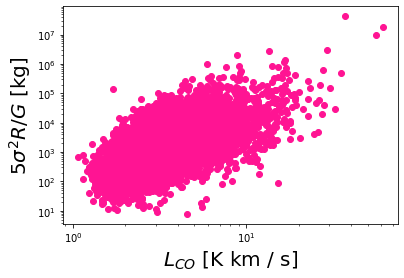

In [6]:
plt.loglog(intlum, virmass, 'o', color = 'deeppink')
plt.xlabel('$L_{CO}$ [K km / s]', fontsize = 20)
plt.ylabel('$5\sigma^2R/G$ [kg]', fontsize = 20)

In [7]:
def linfit(x, m, b):
    return m*x+b

### Next do a sanity check: based on our definitions, $M_v \propto \sigma^2 R$ should be true.



<ipython-input-8-236dfaa0c293>:1: RuntimeWarning: invalid value encountered in log10
  logvirmass = np.log10(virmass)
<ipython-input-8-236dfaa0c293>:2: RuntimeWarning: invalid value encountered in log10
  logvdisp2r = np.log10(vdisp**2*r)


Text(0.5, 1.0, 'M_v = 3.07 S^1.0')

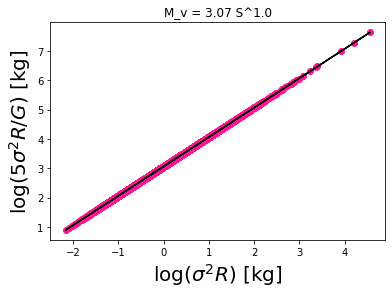

In [8]:
logvirmass = np.log10(virmass)
logvdisp2r = np.log10(vdisp**2*r)
wh = np.where(np.isfinite(logvirmass)==True)
wh1 = np.where(np.isfinite(logvdisp2r[wh])==True)
logvirmass = logvirmass[wh][wh1]
logvdisp2r = logvdisp2r[wh][wh1]
popt, pcov = curve_fit(linfit, logvdisp2r, logvirmass)
plt.plot(logvdisp2r, logvirmass, 'o', color = 'deeppink')
plt.plot(logvdisp2r, linfit(logvdisp2r, *popt), color = 'black')
plt.xlabel('$\log(\sigma^2R)$ [kg]', fontsize = 20)
plt.ylabel('$\log(5\sigma^2R/G)$ [kg]', fontsize = 20)
plt.title(f'M_v = {np.around(popt[1],2)} S^{np.around(popt[0],2)}')

### Next find the $M_v(L)$ relation

<ipython-input-9-8a8d4c30374e>:1: RuntimeWarning: invalid value encountered in log10
  logvirmass = np.log10(virmass)


Text(0.5, 1.0, 'M_v = 2.08 L^2.16')

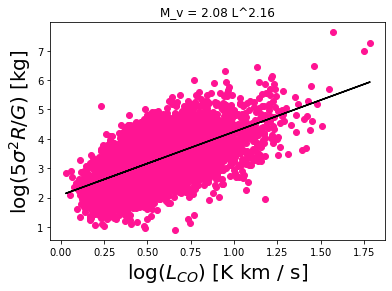

In [9]:
logvirmass = np.log10(virmass)
logintlum = np.log10(intlum)
wh = np.where(np.isfinite(logvirmass)==True)
wh1 = np.where(np.isfinite(logintlum[wh])==True)
logvirmass = logvirmass[wh][wh1]
logintlum = logintlum[wh][wh1]
popt, pcov = curve_fit(linfit, logintlum, logvirmass)
plt.plot(logintlum, logvirmass, 'o', color = 'deeppink')
plt.plot(logintlum, linfit(logintlum, *popt), color = 'black')
plt.xlabel('$\log(L_{CO})$ [K km / s]', fontsize = 20)
plt.ylabel('$\log(5\sigma^2R/G)$ [kg]', fontsize = 20)
plt.title(f'M_v = {np.around(popt[1],2)} L^{np.around(popt[0],2)}')

### It looks like $M_v$ is a power law of luminosity with exponent of ~2. 

### According to Solomon et al 1987 (https://articles.adsabs.harvard.edu/pdf/1987ApJ...319..730S) , some other power laws to look for in molecular clouds are the following:

1) $ M_v \propto R^a$

2) $ M_v \propto \sigma^b$

3) $ L_{CO} \propto \sigma^c$

where $a,b,c$ are constants. Below, we see that there are indeed power laws for each of these relationships.

<ipython-input-10-9ea6711180bd>:1: RuntimeWarning: invalid value encountered in log10
  logvirmass = np.log10(virmass)
<ipython-input-10-9ea6711180bd>:2: RuntimeWarning: invalid value encountered in log10
  logr = np.log10(r)


Text(0.5, 1.0, 'M_v = 2.63 R^1.64')

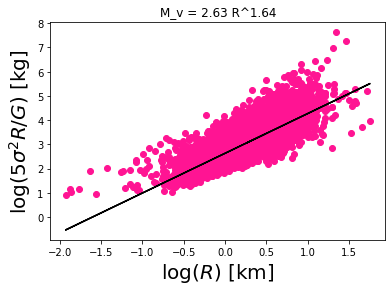

In [10]:
logvirmass = np.log10(virmass)
logr = np.log10(r)
wh = np.where(np.isfinite(logvirmass)==True)
wh1 = np.where(np.isfinite(logr[wh])==True)
logvirmass = logvirmass[wh][wh1]
logr = logr[wh][wh1]
popt, pcov = curve_fit(linfit, logr, logvirmass)
plt.plot(logr, logvirmass, 'o', color = 'deeppink')
plt.plot(logr, linfit(logr, *popt), color = 'black')
plt.xlabel('$\log(R)$ [km]', fontsize = 20)
plt.ylabel('$\log(5\sigma^2R/G)$ [kg]', fontsize = 20)
plt.title(f'M_v = {np.around(popt[1],2)} R^{np.around(popt[0],2)}')

<ipython-input-11-b4c75685183a>:1: RuntimeWarning: invalid value encountered in log10
  logvirmass = np.log10(virmass)


Text(0.5, 1.0, 'M_v = 3.47 S^2.67')

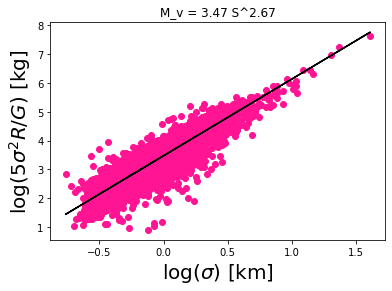

In [11]:
logvirmass = np.log10(virmass)
logvdisp = np.log10(vdisp)
wh = np.where(np.isfinite(logvirmass)==True)
wh1 = np.where(np.isfinite(logvdisp[wh])==True)
logvirmass = logvirmass[wh][wh1]
logvdisp = logvdisp[wh][wh1]
popt, pcov = curve_fit(linfit, logvdisp, logvirmass)
plt.plot(logvdisp, logvirmass, 'o', color = 'deeppink')
plt.plot(logvdisp, linfit(logvdisp, *popt), color = 'black')
plt.xlabel('$\log(\sigma)$ [km]', fontsize = 20)
plt.ylabel('$\log(5\sigma^2R/G)$ [kg]', fontsize = 20)
plt.title(f'M_v = {np.around(popt[1],2)} S^{np.around(popt[0],2)}')

Text(0.5, 1.0, 'L = 0.57 S^0.54')

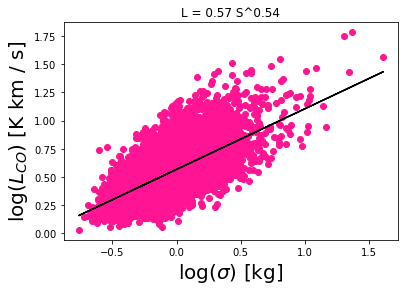

In [12]:
logvdisp = np.log10(vdisp)
logintlum = np.log10(intlum)
wh = np.where(np.isfinite(logvdisp)==True)
wh1 = np.where(np.isfinite(logintlum[wh])==True)
logvdisp = logvdisp[wh][wh1]
logintlum = logintlum[wh][wh1]
popt, pcov = curve_fit(linfit, logvdisp, logintlum)
plt.plot(logvdisp, logintlum, 'o', color = 'deeppink')
plt.plot(logvdisp, linfit(logvdisp, *popt), color = 'black')
plt.ylabel('$\log(L_{CO})$ [K km / s]', fontsize = 20)
plt.xlabel('$\log(\sigma)$ [kg]', fontsize = 20)
plt.title(f'L = {np.around(popt[1],2)} S^{np.around(popt[0],2)}')